In [1]:
library(SingleCellExperiment)
library(dplyr)
library(ggplot2)
library(nichenetr)
library(multinichenetr)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges

In [2]:
organism = "human"

In [3]:
options(timeout = 120)

if(organism == "human"){
  
  lr_network_all = 
    readRDS(url(
      "https://zenodo.org/record/10229222/files/lr_network_human_allInfo_30112033.rds"
      )) %>% 
    mutate(
      ligand = convert_alias_to_symbols(ligand, organism = organism), 
      receptor = convert_alias_to_symbols(receptor, organism = organism))
  
  lr_network_all = lr_network_all  %>% 
    mutate(ligand = make.names(ligand), receptor = make.names(receptor)) 
  
  lr_network = lr_network_all %>% 
    distinct(ligand, receptor)
  
  ligand_target_matrix = readRDS(url(
    "https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final.rds"
    ))
  
  colnames(ligand_target_matrix) = colnames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  rownames(ligand_target_matrix) = rownames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  
  lr_network = lr_network %>% filter(ligand %in% colnames(ligand_target_matrix))
  ligand_target_matrix = ligand_target_matrix[, lr_network$ligand %>% unique()]
  
} else if(organism == "mouse"){
  
  lr_network_all = readRDS(url(
    "https://zenodo.org/record/10229222/files/lr_network_mouse_allInfo_30112033.rds"
    )) %>% 
    mutate(
      ligand = convert_alias_to_symbols(ligand, organism = organism), 
      receptor = convert_alias_to_symbols(receptor, organism = organism))
  
  lr_network_all = lr_network_all  %>% 
    mutate(ligand = make.names(ligand), receptor = make.names(receptor)) 
  lr_network = lr_network_all %>% 
    distinct(ligand, receptor)
  
  ligand_target_matrix = readRDS(url(
    "https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final_mouse.rds"
    ))
  
  colnames(ligand_target_matrix) = colnames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  rownames(ligand_target_matrix) = rownames(ligand_target_matrix) %>% 
    convert_alias_to_symbols(organism = organism) %>% make.names()
  
  lr_network = lr_network %>% filter(ligand %in% colnames(ligand_target_matrix))
  ligand_target_matrix = ligand_target_matrix[, lr_network$ligand %>% unique()]
  
}

[1] "following are the official gene symbols of input aliases: "
  symbol alias
1  YARS1  YARS
[1] "all input symbols were official symbols"
[1] "all input symbols were official symbols"
[1] "all input symbols were official symbols"


In [4]:
sce = readRDS("tutorial/sce_subset_lung.rds")
#sce = alias_to_symbol_SCE(sce, "human") %>% makenames_SCE()

In [5]:
sce

class: SingleCellExperiment 
dim: 15228 19211 
metadata(0):
assays(2): counts logcounts
rownames(15228): PLA1A OR6N1 ... SLC8A2 KRT6A
rowData names(4): feature_biotype feature_is_filtered feature_name
  feature_reference
colnames(19211): HD66_AAACCTGAGGCACATG_1 HD66_AAACCTGCAACTTGAC_1 ...
  TTTACTGCAGGTTTCA-1_18_9 TTTATGCGTTAGATGA-1_18_9
colData names(31): cell dataset_origin ... nFeature_RNA ident
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [6]:
sample_id = "donor"
group_id = "disease"
celltype_id = "annotation.l1"

In [7]:
covariates = NA
batches = NA

In [8]:
#sce@colData

In [9]:
contrasts_oi = c("'idiopathic.pulmonary.fibrosis-normal','normal-idiopathic.pulmonary.fibrosis'")

In [10]:
contrast_tbl = tibble(contrast =
                        c("idiopathic.pulmonary.fibrosis-normal", "normal-idiopathic.pulmonary.fibrosis"),
                      group = c("idiopathic.pulmonary.fibrosis", "normal"))

In [11]:
#SummarizedExperiment::colData(sce)

In [12]:
names(SummarizedExperiment::colData(sce))

[1] "cell"                               "dataset_origin"                    
 [3] "donor"                              "health_status"                     
 [5] "original_annotation"                "predicted.annotation.l1.score"     
 [7] "predicted.annotation.l2.score"      "annotation.l1"                     
 [9] "annotation.l2"                      "prediction_score_l1_bin"           
[11] "prediction_score_l2_bin"            "disease_ontology_term_id"          
[13] "cell_type_ontology_term_id"         "tissue_ontology_term_id"           
[15] "assay_ontology_term_id"             "development_stage_ontology_term_id"
[17] "ethnicity_ontology_term_id"         "sex_ontology_term_id"              
[19] "is_primary_data"                    "organism_ontology_term_id"         
[21] "cell_type"                          "assay"                             
[23] "disease"                            "organism"                          
[25] "sex"                                "tissue"                            
[27] "ethnicity"                          "development_stage"                 
[29] "nCount_RNA"                         "nFeature_RNA"                      
[31] "ident"

In [13]:
#my_data %>% select(Sepal.Length, Petal.Length)

In [14]:
#col_data <-SummarizedExperiment::colData(sce) 
#col_data[['orig.ident']]

In [15]:
senders_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
receivers_oi = SummarizedExperiment::colData(sce)[,celltype_id] %>% unique()
sce = sce[, SummarizedExperiment::colData(sce)[,celltype_id] %in% 
            c(senders_oi, receivers_oi)
          ]

In [16]:
senders_oi

[1] "CD16..Monocyte"             "Alveolar.Epithelial.Type.1"
[3] "Fibroblast"                 "Proliferating.Macrophage"

In [17]:
receivers_oi

[1] "CD16..Monocyte"             "Alveolar.Epithelial.Type.1"
[3] "Fibroblast"                 "Proliferating.Macrophage"

In [18]:
conditions_keep = c("normal", "idiopathic.pulmonary.fibrosis")
sce = sce[, SummarizedExperiment::colData(sce)[,group_id] %in% 
            conditions_keep
          ]

In [19]:
min_cells = 10

In [20]:
abundance_info = get_abundance_info(
  sce = sce, 
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id, 
  min_cells = min_cells, 
  senders_oi = senders_oi, receivers_oi = receivers_oi, 
  batches = batches
  )

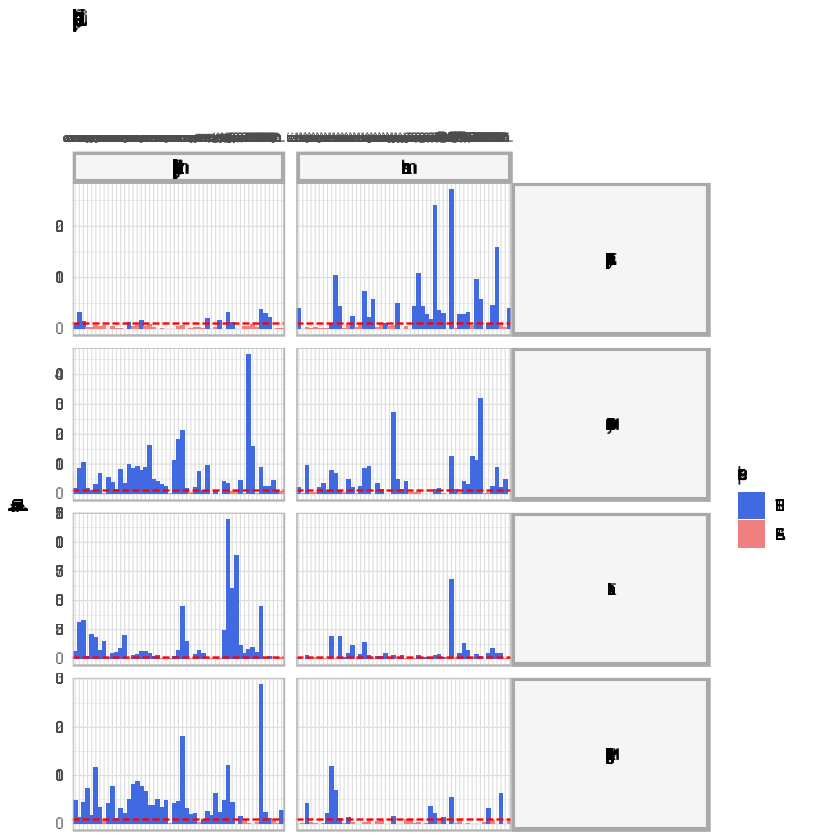

In [21]:
abundance_info$abund_plot_sample

In [22]:
sample_group_celltype_df = abundance_info$abundance_data %>%
  filter(n > min_cells) %>%
  ungroup() %>%
  distinct(sample_id, group_id) %>%
  cross_join(
    abundance_info$abundance_data %>%
      ungroup() %>%
      distinct(celltype_id)
    ) %>%
  arrange(sample_id)

abundance_df = sample_group_celltype_df %>% left_join(
  abundance_info$abundance_data %>% ungroup()
  )

abundance_df$n[is.na(abundance_df$n)] = 0
abundance_df$keep[is.na(abundance_df$keep)] = FALSE
abundance_df_summarized = abundance_df %>%
  mutate(keep = as.logical(keep)) %>%
  group_by(group_id, celltype_id) %>%
  summarise(samples_present = sum((keep)))

celltypes_absent_one_condition = abundance_df_summarized %>%
  filter(samples_present == 0) %>% pull(celltype_id) %>% unique()
# find truly condition-specific cell types by searching for cell types
# truely absent in at least one condition

celltypes_present_one_condition = abundance_df_summarized %>%
  filter(samples_present >= 2) %>% pull(celltype_id) %>% unique()
# require presence in at least 2 samples of one group so
# it is really present in at least one condition

condition_specific_celltypes = intersect(
  celltypes_absent_one_condition,
  celltypes_present_one_condition)

total_nr_conditions = SummarizedExperiment::colData(sce)[,group_id] %>%
  unique() %>% length()

absent_celltypes = abundance_df_summarized %>%
  filter(samples_present < 2) %>%
  group_by(celltype_id) %>%
  count() %>%
  filter(n == total_nr_conditions) %>%
  pull(celltype_id)

print("condition-specific celltypes:")
## [1] "condition-specific celltypes:"
print(condition_specific_celltypes)
## [1] "L_T_TIM3._CD38._HLADR."

print("absent celltypes:")
## [1] "absent celltypes:"
print(absent_celltypes)
## character(0)

Joining with `by = join_by(sample_id, group_id, celltype_id)`
`summarise()` has grouped output by 'group_id'. You can override using the `.groups` argument.


[1] "condition-specific celltypes:"
character(0)
[1] "absent celltypes:"
character(0)


In [23]:
analyse_condition_specific_celltypes = FALSE

if(analyse_condition_specific_celltypes == TRUE){
  senders_oi = senders_oi %>% setdiff(absent_celltypes)
  receivers_oi = receivers_oi %>% setdiff(absent_celltypes)
} else {
  senders_oi = senders_oi %>%
    setdiff(union(absent_celltypes, condition_specific_celltypes))
  receivers_oi = receivers_oi %>%
    setdiff(union(absent_celltypes, condition_specific_celltypes))
}

sce = sce[, SummarizedExperiment::colData(sce)[,celltype_id] %in%
            c(senders_oi, receivers_oi)
          ]

In [24]:

min_sample_prop = 0.50
fraction_cutoff = 0.05

frq_list = get_frac_exprs(
  sce = sce,
  sample_id = sample_id, celltype_id =  celltype_id, group_id = group_id,
  batches = batches,
  min_cells = min_cells,
  fraction_cutoff = fraction_cutoff, min_sample_prop = min_sample_prop)



genes_oi = frq_list$expressed_df %>%
  filter(expressed == TRUE) %>% pull(gene) %>% unique()
sce = sce[genes_oi, ]

Warning message in get_frac_exprs(sce = sce, sample_id = sample_id, celltype_id = celltype_id, :
“There are some genes with NA/NaN fraction of expression. This is the result of the muscat function `calcExprFreqs` which will give NA/NaN when there are no cells of a particular cell type in a particular group or no cells of a cell type in one sample. As a temporary fix, we give all these genes an expression fraction of 0 in that group for that cell type”
Joining with `by = join_by(sample, group)`


[1] "Samples are considered if they have more than 10 cells of the cell type of interest"


Joining with `by = join_by(sample, celltype)`


[1] "Genes with non-zero counts in at least 5% of cells of a cell type of interest in a particular sample will be considered as expressed in that sample."
[1] "Genes expressed in at least 6 samples will considered as expressed in the cell type: Alveolar.Epithelial.Type.1"
[1] "Genes expressed in at least 16 samples will considered as expressed in the cell type: CD16..Monocyte"
[1] "Genes expressed in at least 16 samples will considered as expressed in the cell type: Fibroblast"
[1] "Genes expressed in at least 6.5 samples will considered as expressed in the cell type: Proliferating.Macrophage"


Joining with `by = join_by(sample)`
Joining with `by = join_by(celltype)`
Joining with `by = join_by(sample, celltype, group)`


[1] "10193 genes are considered as expressed in the cell type: Alveolar.Epithelial.Type.1"
[1] "8810 genes are considered as expressed in the cell type: CD16..Monocyte"
[1] "10643 genes are considered as expressed in the cell type: Fibroblast"
[1] "11018 genes are considered as expressed in the cell type: Proliferating.Macrophage"


In [25]:
genes_oi

[1] "A1BG"          "A2M"           "A2ML1"         "A3GALT2"      
    [5] "A4GALT"        "A4GNT"         "AAAS"          "AACS"         
    [9] "AADAT"         "AAGAB"         "AAK1"          "AAMDC"        
   [13] "AAMP"          "AAR2"          "AARD"          "AARS1"        
   [17] "AARS2"         "AASDH"         "AASDHPPT"      "AASS"         
   [21] "AATK"          "ABAT"          "ABCA1"         "ABCA10"       
   [25] "ABCA12"        "ABCA13"        "ABCA2"         "ABCA3"        
   [29] "ABCA5"         "ABCA6"         "ABCA7"         "ABCA8"        
   [33] "ABCA9"         "ABCB1"         "ABCB10"        "ABCB5"        
   [37] "ABCB6"         "ABCB7"         "ABCB8"         "ABCB9"        
   [41] "ABCC10"        "ABCC11"        "ABCC2"         "ABCC3"        
   [45] "ABCC4"         "ABCC5"         "ABCC9"         "ABCD3"        
   [49] "ABCD4"         "ABCE1"         "ABCF3"         "ABCG1"        
   [53] "ABCG2"         "ABHD10"        "ABHD12"        "ABHD13"       
   [57] "ABHD14A"       "ABHD14B"       "ABHD15"        "ABHD17A"      
   [61] "ABHD17B"       "ABHD17C"       "ABHD2"         "ABHD3"        
   [65] "ABHD4"         "ABHD5"         "ABHD6"         "ABHD8"        
   [69] "ABI1"          "ABI2"          "ABI3"          "ABI3BP"       
   [73] "ABL1"          "ABL2"          "ABLIM1"        "ABLIM2"       
   [77] "ABLIM3"        "ABRACL"        "ABTB1"         "ABTB2"        
   [81] "ACAA1"         "ACAA2"         "ACACB"         "ACAD10"       
   [85] "ACAD11"        "ACAD8"         "ACAD9"         "ACADL"        
   [89] "ACADM"         "ACADS"         "ACADSB"        "ACADVL"       
   [93] "ACAP2"         "ACAP3"         "ACAT1"         "ACAT2"        
   [97] "ACBD3"         "ACBD4"         "ACBD5"         "ACCS"         
  [101] "ACD"           "ACER1"         "ACER2"         "ACHE"         
  [105] "ACIN1"         "ACKR2"         "ACKR3"         "ACKR4"        
  [109] "ACO1"          "ACO2"          "ACOT1"         "ACOT11"       
  [113] "ACOT13"        "ACOT2"         "ACOT4"         "ACOT7"        
  [117] "ACOT8"         "ACOT9"         "ACOX1"         "ACOX2"        
  [121] "ACOX3"         "ACOXL"         "ACP1"          "ACP2"         
  [125] "ACP3"          "ACP5"          "ACRBP"         "ACSBG1"       
  [129] "ACSF2"         "ACSF3"         "ACSL1"         "ACSL3"        
  [133] "ACSL4"         "ACSL5"         "ACSM1"         "ACSM3"        
  [137] "ACSM5"         "ACSS1"         "ACSS2"         "ACSS3"        
  [141] "ACTA2"         "ACTB"          "ACTL6A"        "ACTN1"        
  [145] "ACTN2"         "ACTR10"        "ACTR1A"        "ACTR1B"       
  [149] "ACTR2"         "ACTR3"         "ACTR3B"        "ACTR3C"       
  [153] "ACTR5"         "ACTR6"         "ACTR8"         "ACTRT3"       
  [157] "ACVR1"         "ACVR1B"        "ACVR1C"        "ACVR2A"       
  [161] "ACVR2B"        "ACVRL1"        "ACYP1"         "ACYP2"        
  [165] "ADA"           "ADAL"          "ADAM10"        "ADAM12"       
  [169] "ADAM15"        "ADAM17"        "ADAM19"        "ADAM22"       
  [173] "ADAM23"        "ADAM28"        "ADAM29"        "ADAM33"       
  [177] "ADAM8"         "ADAMDEC1"      "ADAMTS1"       "ADAMTS14"     
  [181] "ADAMTS15"      "ADAMTS16"      "ADAMTS17"      "ADAMTS18"     
  [185] "ADAMTS19"      "ADAMTS20"      "ADAMTS3"       "ADAMTS4"      
  [189] "ADAMTS5"       "ADAMTS6"       "ADAMTS7"       "ADAMTS8"      
  [193] "ADAMTS9"       "ADAMTSL1"      "ADAMTSL2"      "ADAMTSL3"     
  [197] "ADAMTSL4"      "ADAMTSL5"      "ADAP1"         "ADAP2"        
  [201] "ADAR"          "ADARB1"        "ADARB2"        "ADAT1"        
  [205] "ADAT2"         "ADCK1"         "ADCK2"         "ADCY1"        
  [209] "ADCY10"        "ADCY2"         "ADCY3"         "ADCY5"        
  [213] "ADCY6"         "ADCY7"         "ADCY9"         "ADD1"         
  [217] "ADD3"          "ADGB"          "ADGRG6"        "ADH1B"        
  [221] "ADH5"          "ADHFE1"        "ADI

In [26]:
frq_list

gene,sample,fraction_sample,celltype,group,expressed_sample
<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>
PLA1A,pVUHD66,0.12,CD16..Monocyte,normal,TRUE
OR6N1,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
SYCP3,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
PLA2G2D,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
GYS1,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
TLR5,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
LRRC10B,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
ASIP,pVUHD66,0.00,CD16..Monocyte,normal,FALSE
KLK10,pVUHD66,0.00,CD16..Monocyte,normal,FALSE


In [27]:
abundance_expression_info = process_abundance_expression_info(
  sce = sce,
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id,
  min_cells = min_cells,
  senders_oi = senders_oi, receivers_oi = receivers_oi,
  lr_network = lr_network,
  batches = batches,
  frq_list = frq_list,
  abundance_info = abundance_info)


Warning message in DGEList.default(pb@assays@data[[celltype_oi]]):
“At least one library size is zero”
Warning message in DGEList.default(pb@assays@data[[celltype_oi]]):
“At least one library size is zero”
Warning message in DGEList.default(pb@assays@data[[celltype_oi]]):
“At least one library size is zero”
Warning message in DGEList.default(pb@assays@data[[celltype_oi]]):
“At least one library size is zero”
Joining with `by = join_by(sender, receiver, ligand, receptor)`
Joining with `by = join_by(sender, receiver, ligand, receptor)`
Joining with `by = join_by(sender, receiver, ligand, receptor)`


In [28]:
abundance_expression_info$celltype_info$pb_df %>% head()

gene,sample,pb_sample,celltype
<chr>,<chr>,<dbl>,<fct>
A1BG,p001C,3.679556,CD16..Monocyte
A2M,p001C,0.000000,CD16..Monocyte
A2ML1,p001C,0.000000,CD16..Monocyte
A3GALT2,p001C,0.000000,CD16..Monocyte
A4GALT,p001C,0.000000,CD16..Monocyte
A4GNT,p001C,0.000000,CD16..Monocyte


In [29]:
abundance_expression_info$celltype_info$pb_df_group %>% head()

group,celltype,gene,pb_group
<chr>,<chr>,<chr>,<dbl>
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A1BG,3.2490763
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A2M,2.6938425
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A2ML1,0.3970408
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A3GALT2,0.0000000
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A4GALT,1.0750391
idiopathic.pulmonary.fibrosis,Alveolar.Epithelial.Type.1,A4GNT,0.0000000


In [30]:
abundance_expression_info$sender_receiver_info$pb_df %>% head()

sample,sender,receiver,ligand,receptor,pb_ligand,pb_receptor,ligand_receptor_pb_prod
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
pTILD006,Fibroblast,Fibroblast,TIMP1,CD63,14.86502,12.47215,185.3986
pSC31,Fibroblast,Fibroblast,TIMP1,CD63,15.07611,12.02246,181.2520
pSC45NOR,Fibroblast,Fibroblast,TIMP1,CD63,14.51863,12.40814,180.1492
pTILD006,CD16..Monocyte,Fibroblast,TIMP1,CD63,14.20758,12.47215,177.1990
pSC45NOR,Fibroblast,Alveolar.Epithelial.Type.1,TIMP1,CD63,14.51863,12.13762,176.2217
pSC31,Fibroblast,CD16..Monocyte,TIMP1,CD63,15.07611,11.55062,174.1385


In [31]:
abundance_expression_info$sender_receiver_info$pb_df_group %>% head()

group,sender,receiver,ligand,receptor,pb_ligand_group,pb_receptor_group,ligand_receptor_pb_prod_group
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
idiopathic.pulmonary.fibrosis,Fibroblast,Fibroblast,TIMP1,CD63,12.53623,11.19661,140.3634
idiopathic.pulmonary.fibrosis,Fibroblast,Alveolar.Epithelial.Type.1,TIMP1,CD63,12.53623,10.96900,137.5100
idiopathic.pulmonary.fibrosis,Fibroblast,Proliferating.Macrophage,TIMP1,CD63,12.53623,10.89979,136.6423
normal,Fibroblast,Fibroblast,TIMP1,CD63,12.34389,10.86462,134.1117
normal,Fibroblast,Alveolar.Epithelial.Type.1,TIMP1,CD63,12.34389,10.75746,132.7890
normal,Fibroblast,Proliferating.Macrophage,TIMP1,CD63,12.34389,10.67196,131.7335


In [32]:
  DE_info = get_DE_info(
  sce = sce,
  sample_id = sample_id, group_id = group_id, celltype_id = celltype_id,
  batches = batches, covariates = covariates,
  contrasts_oi = contrasts_oi,
  min_cells = min_cells,
  expressed_df = frq_list$expressed_df)

[1] "DE analysis is done:"
[1] "included cell types are:"
[1] "CD16..Monocyte"             "Alveolar.Epithelial.Type.1"
[3] "Fibroblast"                 "Proliferating.Macrophage"  


gene,cluster_id,logFC,logCPM,F,p_val,p_adj.loc,p_adj,contrast
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
A1BG,CD16..Monocyte,-0.19300,5.08,0.525,0.471,0.868,0.868,idiopathic.pulmonary.fibrosis-normal
A2M,CD16..Monocyte,0.17700,4.05,0.229,0.634,0.940,0.940,idiopathic.pulmonary.fibrosis-normal
AAAS,CD16..Monocyte,-0.08570,4.43,0.108,0.743,0.970,0.970,idiopathic.pulmonary.fibrosis-normal
AACS,CD16..Monocyte,-0.46600,3.88,1.500,0.224,0.704,0.704,idiopathic.pulmonary.fibrosis-normal
AAGAB,CD16..Monocyte,0.00992,5.46,0.002,0.964,0.996,0.996,idiopathic.pulmonary.fibrosis-normal
AAK1,CD16..Monocyte,-0.15700,6.69,0.677,0.413,0.841,0.841,idiopathic.pulmonary.fibrosis-normal


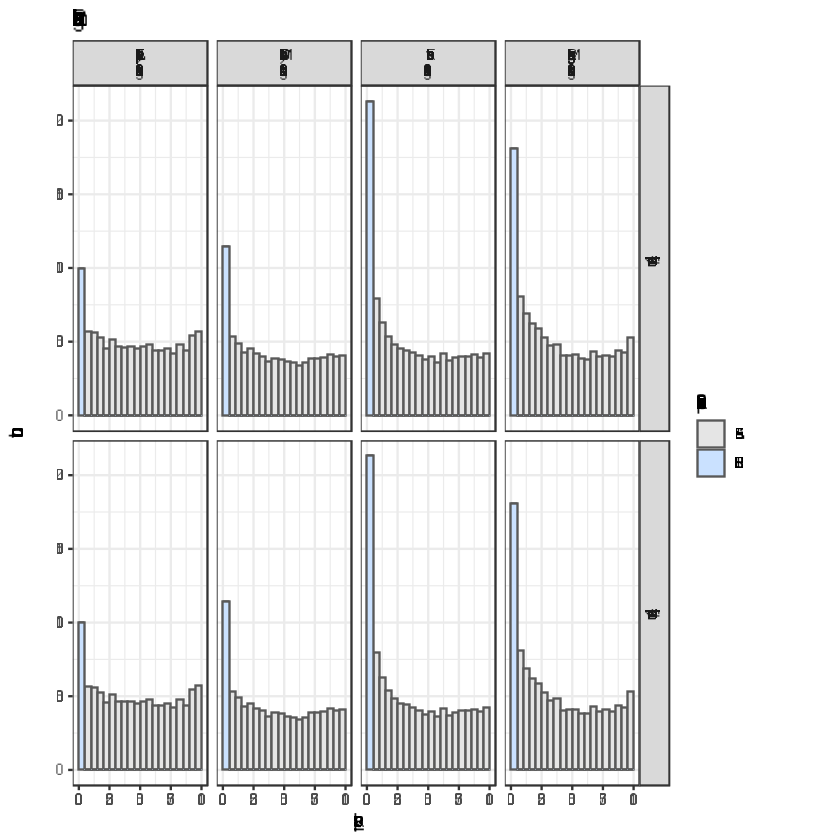

In [33]:
DE_info$celltype_de$de_output_tidy %>% head()

DE_info$hist_pvals

empirical_pval = FALSE

if(empirical_pval == TRUE){
  DE_info_emp = get_empirical_pvals(DE_info$celltype_de$de_output_tidy)
  celltype_de = DE_info_emp$de_output_tidy_emp %>% select(-p_val, -p_adj) %>%
    rename(p_val = p_emp, p_adj = p_adj_emp)
} else {
  celltype_de = DE_info$celltype_de$de_output_tidy
}

In [34]:
sender_receiver_de = combine_sender_receiver_de(
  sender_de = celltype_de,
  receiver_de = celltype_de,
  senders_oi = senders_oi,
  receivers_oi = receivers_oi,
  lr_network = lr_network
)

sender_receiver_de %>% head(20)

contrast,sender,receiver,ligand,receptor,lfc_ligand,lfc_receptor,ligand_receptor_lfc_avg,p_val_ligand,p_adj_ligand,p_val_receptor,p_adj_receptor
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
idiopathic.pulmonary.fibrosis-normal,Alveolar.Epithelial.Type.1,Alveolar.Epithelial.Type.1,CDH2,CDH2,3.95,3.9500,3.95000,2.95e-08,1.43e-05,2.95e-08,1.43e-05
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Proliferating.Macrophage,PPBP,GRM7,5.52,1.6300,3.57500,3.65e-07,3.09e-04,9.19e-03,1.36e-01
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Proliferating.Macrophage,PPBP,OPRD1,5.52,1.2000,3.36000,3.65e-07,3.09e-04,1.00e-01,4.23e-01
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Fibroblast,PPBP,ADRA2A,5.52,0.9150,3.21750,3.65e-07,3.09e-04,2.86e-02,1.79e-01
normal-idiopathic.pulmonary.fibrosis,Fibroblast,Alveolar.Epithelial.Type.1,HP,APOA1,3.52,2.8200,3.17000,1.46e-05,1.15e-03,6.44e-04,4.22e-02
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Fibroblast,PPBP,OPRM1,5.52,0.7770,3.14850,3.65e-07,3.09e-04,1.40e-01,4.35e-01
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Proliferating.Macrophage,CCL7,CCR3,4.64,1.5900,3.11500,1.01e-06,5.68e-04,1.98e-02,2.00e-01
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Proliferating.Macrophage,CCL22,DPP4,3.28,2.8600,3.07000,1.74e-03,5.53e-02,2.90e-03,7.31e-02
idiopathic.pulmonary.fibrosis-normal,Proliferating.Macrophage,Fibroblast,PPBP,GRM7,5.52,0.5390,3.02950,3.65e-07,3.09e-04,2.24e-01,5.52e-01


In [35]:
logFC_threshold = 0.50
p_val_threshold = 0.05

p_val_adj = FALSE

geneset_assessment = contrast_tbl$contrast %>%
  lapply(
    process_geneset_data,
    celltype_de, logFC_threshold, p_val_adj, p_val_threshold
  ) %>%
  bind_rows()
geneset_assessment

geneset_assessment_adjustedPval = contrast_tbl$contrast %>%
  lapply(
    process_geneset_data,
    celltype_de, logFC_threshold, p_val_adj = TRUE, p_val_threshold
    ) %>%
  bind_rows()
geneset_assessment_adjustedPval

Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`


cluster_id,n_background,n_geneset_up,n_geneset_down,prop_geneset_up,prop_geneset_down,in_range_up,in_range_down,contrast,logFC_threshold,p_val_threshold,adjusted
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>
Alveolar.Epithelial.Type.1,10193,568,423,0.05572452,0.04149907,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,FALSE
CD16..Monocyte,8810,392,574,0.04449489,0.06515323,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,FALSE
Fibroblast,10643,1234,510,0.11594475,0.04791882,FALSE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,FALSE
Proliferating.Macrophage,11018,770,596,0.06988564,0.05409330,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,FALSE
Alveolar.Epithelial.Type.1,10193,423,568,0.04149907,0.05572452,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,FALSE
CD16..Monocyte,8810,574,392,0.06515323,0.04449489,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,FALSE
Fibroblast,10643,510,1234,0.04791882,0.11594475,TRUE,FALSE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,FALSE
Proliferating.Macrophage,11018,596,770,0.05409330,0.06988564,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,FALSE


Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`
Joining with `by = join_by(cluster_id)`


cluster_id,n_background,n_geneset_up,n_geneset_down,prop_geneset_up,prop_geneset_down,in_range_up,in_range_down,contrast,logFC_threshold,p_val_threshold,adjusted
<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>,<dbl>,<dbl>,<lgl>
Alveolar.Epithelial.Type.1,10193,132,31,0.012950064,0.003041303,TRUE,FALSE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,TRUE
CD16..Monocyte,8810,105,116,0.011918275,0.013166856,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,TRUE
Fibroblast,10643,555,201,0.052146951,0.018885653,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,TRUE
Proliferating.Macrophage,11018,149,166,0.013523325,0.015066255,TRUE,TRUE,idiopathic.pulmonary.fibrosis-normal,0.5,0.05,TRUE
Alveolar.Epithelial.Type.1,10193,31,132,0.003041303,0.012950064,FALSE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,TRUE
CD16..Monocyte,8810,116,105,0.013166856,0.011918275,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,TRUE
Fibroblast,10643,201,555,0.018885653,0.052146951,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,TRUE
Proliferating.Macrophage,11018,166,149,0.015066255,0.013523325,TRUE,TRUE,normal-idiopathic.pulmonary.fibrosis,0.5,0.05,TRUE


In [36]:
write.csv(geneset_assessment_adjustedPval,'gene_assessment_adj_pval.csv',quote=FALSE,row.names=TRUE)
write.csv(geneset_assessment,'gene_assessment.csv',quote=FALSE,row.names=TRUE)

In [37]:
top_n_target = 250

verbose = TRUE
cores_system = 8
n.cores = min(cores_system, celltype_de$cluster_id %>% unique() %>% length())

ligand_activities_targets_DEgenes = suppressMessages(suppressWarnings(
  get_ligand_activities_targets_DEgenes(
    receiver_de = celltype_de,
    receivers_oi = intersect(receivers_oi, celltype_de$cluster_id %>% unique()),
    ligand_target_matrix = ligand_target_matrix,
    logFC_threshold = logFC_threshold,
    p_val_threshold = p_val_threshold,
    p_val_adj = p_val_adj,
    top_n_target = top_n_target,
    verbose = verbose,
    n.cores = n.cores
  )
))

ligand_activities_targets_DEgenes$ligand_activities %>% head(20)


ligand,activity,contrast,target,ligand_target_weight,receiver,direction_regulation,activity_scaled
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<fct>,<dbl>
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,BAX,0.011493623,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,BMP4,0.007763145,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,CCL2,0.011742125,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,CCND1,0.018637856,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,CCND2,0.009542693,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,CDKN1A,0.021793639,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,CDKN2A,0.007160860,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,COL1A1,0.007197456,Alveolar.Epithelial.Type.1,up,0.990758
A2M,0.03469614,idiopathic.pulmonary.fibrosis-normal,COL1A2,0.008337760,Alveolar.Epithelial.Type.1,up,0.990758


In [38]:
write.csv(ligand_activities_targets_DEgenes$ligand_activities,'ligand_activities.csv',quote=FALSE,row.names=TRUE)

In [39]:
multinichenet_output = multi_nichenet_analysis(
  sce = sce, 
  celltype_id = celltype_id, sample_id = 'batch', group_id = 'batch', 
  batches = batches, covariates = covariates, 
  lr_network = lr_network, ligand_target_matrix = ligand_target_matrix, 
  contrasts_oi = contrasts_oi, contrast_tbl = contrast_tbl, 
  senders_oi = senders_oi, receivers_oi = receivers_oi,
  min_cells = min_cells, 
  fraction_cutoff = fraction_cutoff, 
  min_sample_prop = min_sample_prop,
  scenario = scenario, 
  ligand_activity_down = ligand_activity_down,
  logFC_threshold = logFC_threshold, 
  p_val_threshold = p_val_threshold, 
  p_val_adj = p_val_adj, 
  empirical_pval = empirical_pval, 
  top_n_target = top_n_target, 
  n.cores = n.cores, 
  verbose = TRUE
  )
## [1] "Make diagnostic abundance plots + define expressed genes"
## [1] "condition-specific celltypes:"
## character(0)
## [1] "absent celltypes:"
## character(0)
## [1] "Samples are considered if they have more than 10 cells of the cell type of interest"
## [1] "Genes with non-zero counts in at least 5% of cells of a cell type of interest in a particular sample will be considered as expressed in that sample."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: L_NK_CD56._CD16."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
## [1] "Genes expressed in at least 2.5 samples will considered as expressed in the cell type: M_Monocyte_CD16"
## [1] "6010 genes are considered as expressed in the cell type: L_NK_CD56._CD16."
## [1] "7589 genes are considered as expressed in the cell type: L_T_TIM3._CD38._HLADR."
## [1] "7798 genes are considered as expressed in the cell type: M_Monocyte_CD16"
## [1] "Calculate differential expression for all cell types"
## [1] "DE analysis is done:"
## [1] "included cell types are:"
## [1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"       
## [1] "retained cell types"
## [1] "L_T_TIM3._CD38._HLADR." "L_NK_CD56._CD16."       "M_Monocyte_CD16"       
## [1] "Calculate normalized average and pseudobulk expression"
## [1] "Calculate NicheNet ligand activities and ligand-target links"
## [1] "Combine all the information in prioritization tables"
## [1] "Calculate correlation between LR pairs and target genes"
## [1] "There are no condition specific cell types in the data. MultiNicheNet analysis is performed in the regular way for all cell types."

ERROR: Error in multi_nichenet_analysis(sce = sce, celltype_id = celltype_id, : sample_id should be a column name in the metadata dataframe of sce
